In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

### One Dimensional Discrete Fourier Transform

![](formula/1d-fourier-transform.jpg "1 dimension discret fft")

In [60]:
### 3.4 Fourier Transform

# 1 dimensional discrete fourier transform (dft)
def dft(x: np.ndarray) -> np.ndarray:
    assert len(x.shape) == 1, "One dimension only"
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape(N, 1)
    k = np.exp(-2.j * np.pi * k * n / N)
    
    return k @ x


a = np.ones((3,), dtype=np.float16) / 3
print(dft(a))

[ 9.99755859e-01+0.00000000e+00j -5.55111512e-17-5.55111512e-17j
  1.11022302e-16-2.22044605e-16j]


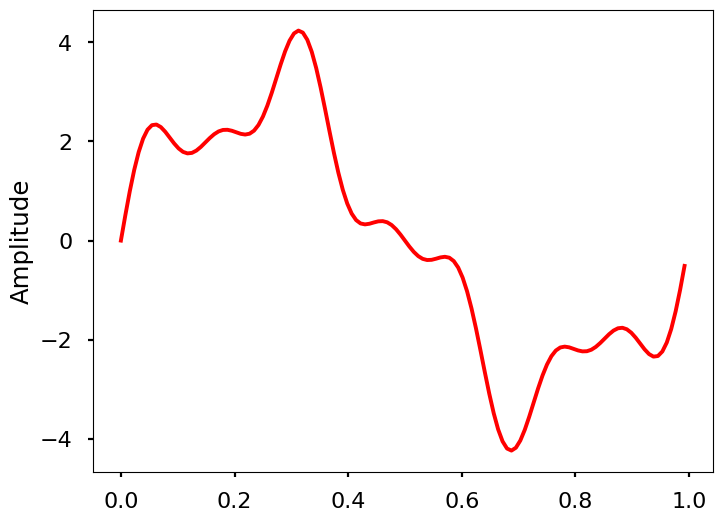

In [59]:
# 1 dimensional continuous fourier transform (fft)
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X
    
    
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, "r")
plt.ylabel("Amplitude")

plt.show()

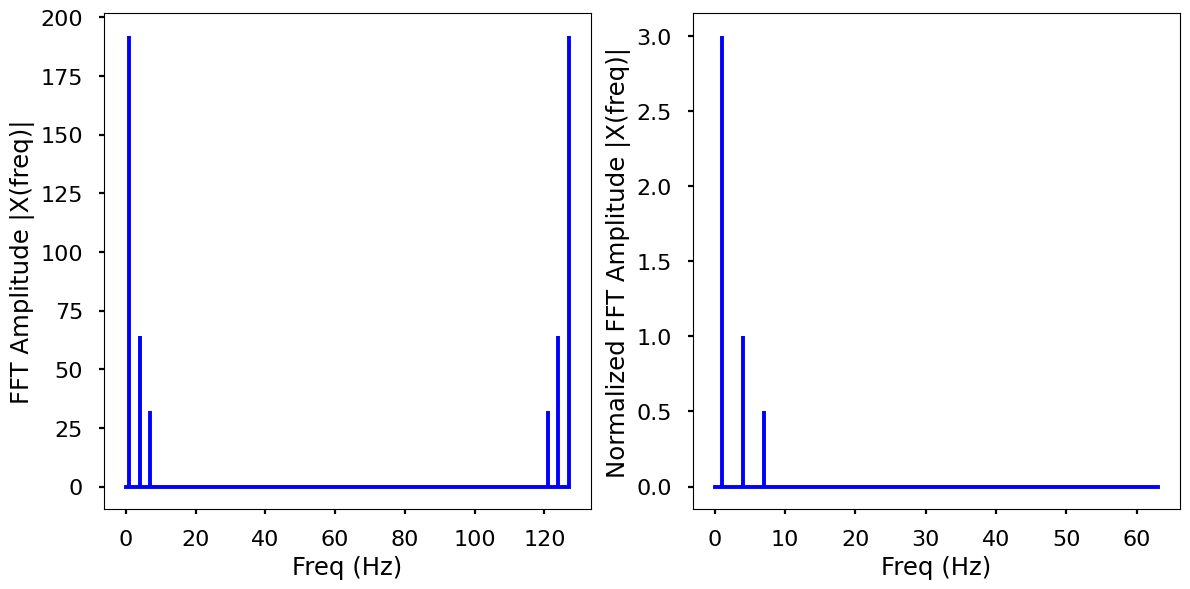

In [58]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), "b", \
         markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("FFT Amplitude |X(freq)|")

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), "b", markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("Normalized FFT Amplitude |X(freq)|")
plt.tight_layout()
plt.show()

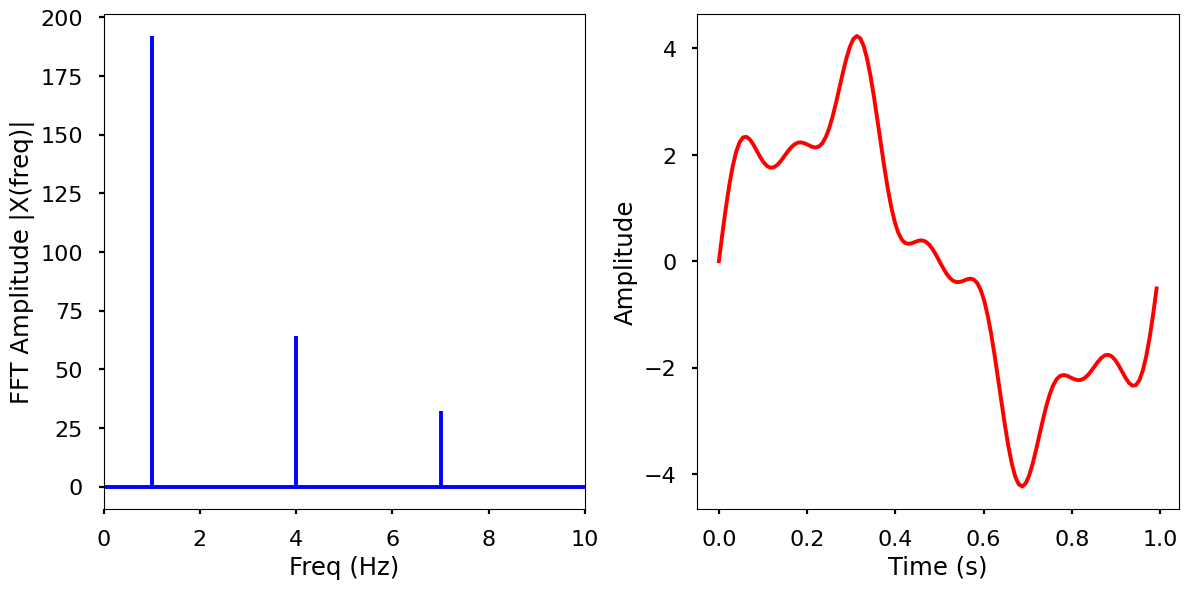

In [57]:
X = np.fft.fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), "b", markerfmt=" ", basefmt="-b")
plt.xlabel("Freq (Hz)")
plt.ylabel("FFT Amplitude |X(freq)|")
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, np.fft.ifft(X), "r")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

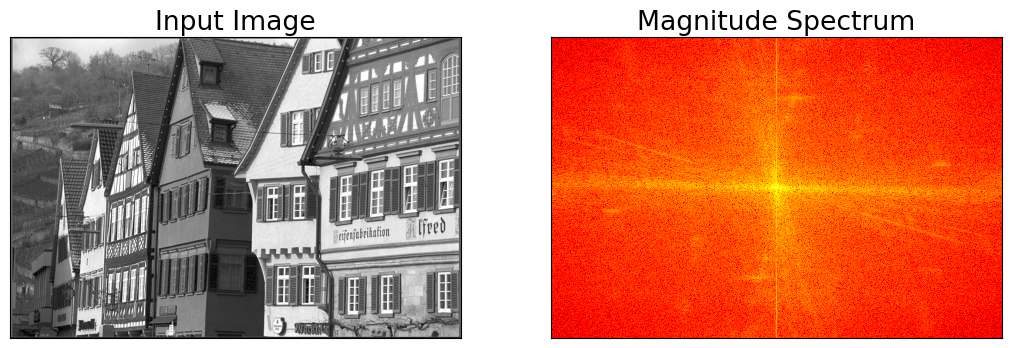

In [85]:
# 2 dimensional fourier transform for image frequency and amplitude analysis
img = cv2.imread("sample/house_gray.jpg", cv2.IMREAD_GRAYSCALE)
img_fft = np.fft.fft2(img)
# Now once you got the result, zero frequency component (DC component) will be at top left corner. 
# If you want to bring it to center, you need to shift the result by N/2 in both the directions. 
img_shift = np.fft.fftshift(img_fft)
magnitude = 20 * np.log(np.abs(img_shift))

plt.subplot(121),plt.imshow(img, cmap = "gray")
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude, cmap = "hot", interpolation="nearest")
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])
plt.show()

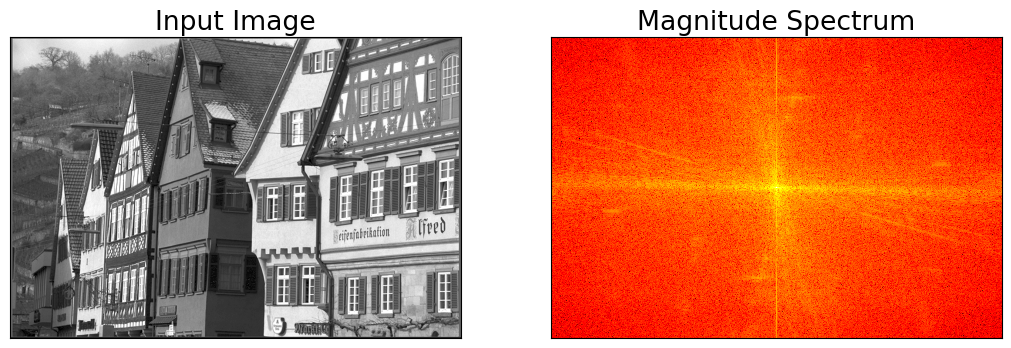

In [86]:
# using opencv dft implementation
img = cv2.imread("sample/house_gray.jpg", cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude = 20 * np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = "gray")
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude, cmap = "hot", interpolation="nearest")
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])
plt.show()

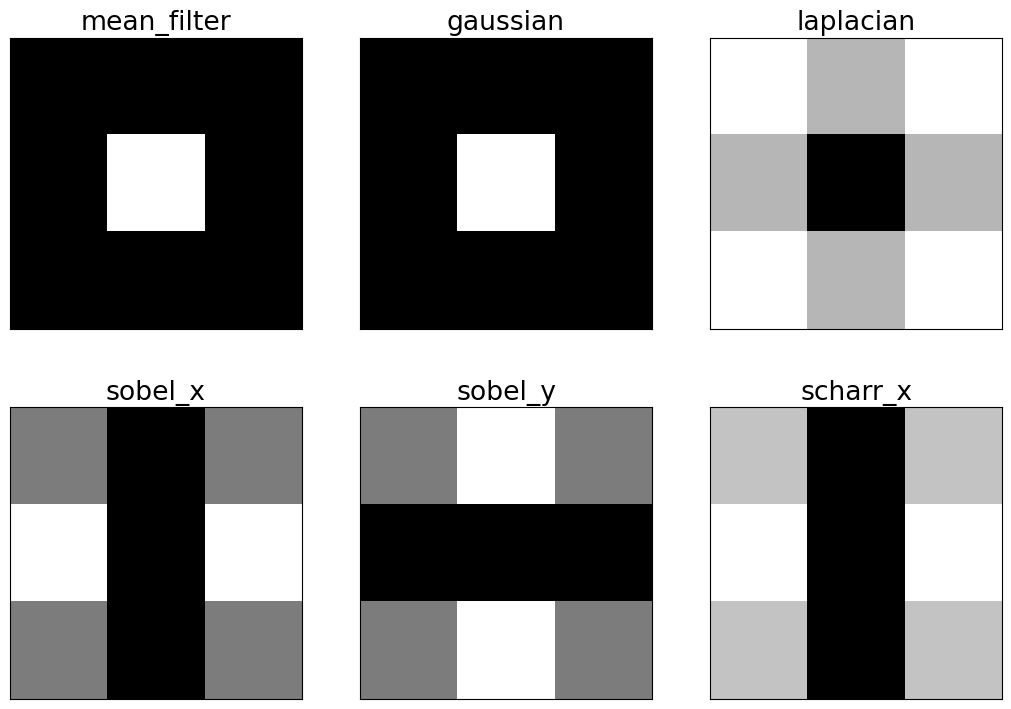

In [100]:
# Analyzing high-low pass 
# High pass filters allow the high frequency spectrum to be passed while filtering out the low frequencies
# In the shifted spectrum plot, we can see that high frequencies lie around the perameters of the plots whereas low frequency regions lie nearer the center of the magnitude plots
mean_filter = np.ones((3,3))

gaussian = cv2.getGaussianKernel(3, 10)
gaussian = gaussian@gaussian.T

scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ["mean_filter", "gaussian","laplacian", "sobel_x", "sobel_y", "scharr_x"]
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
 
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = "gray", interpolation="nearest")
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
 
plt.show()

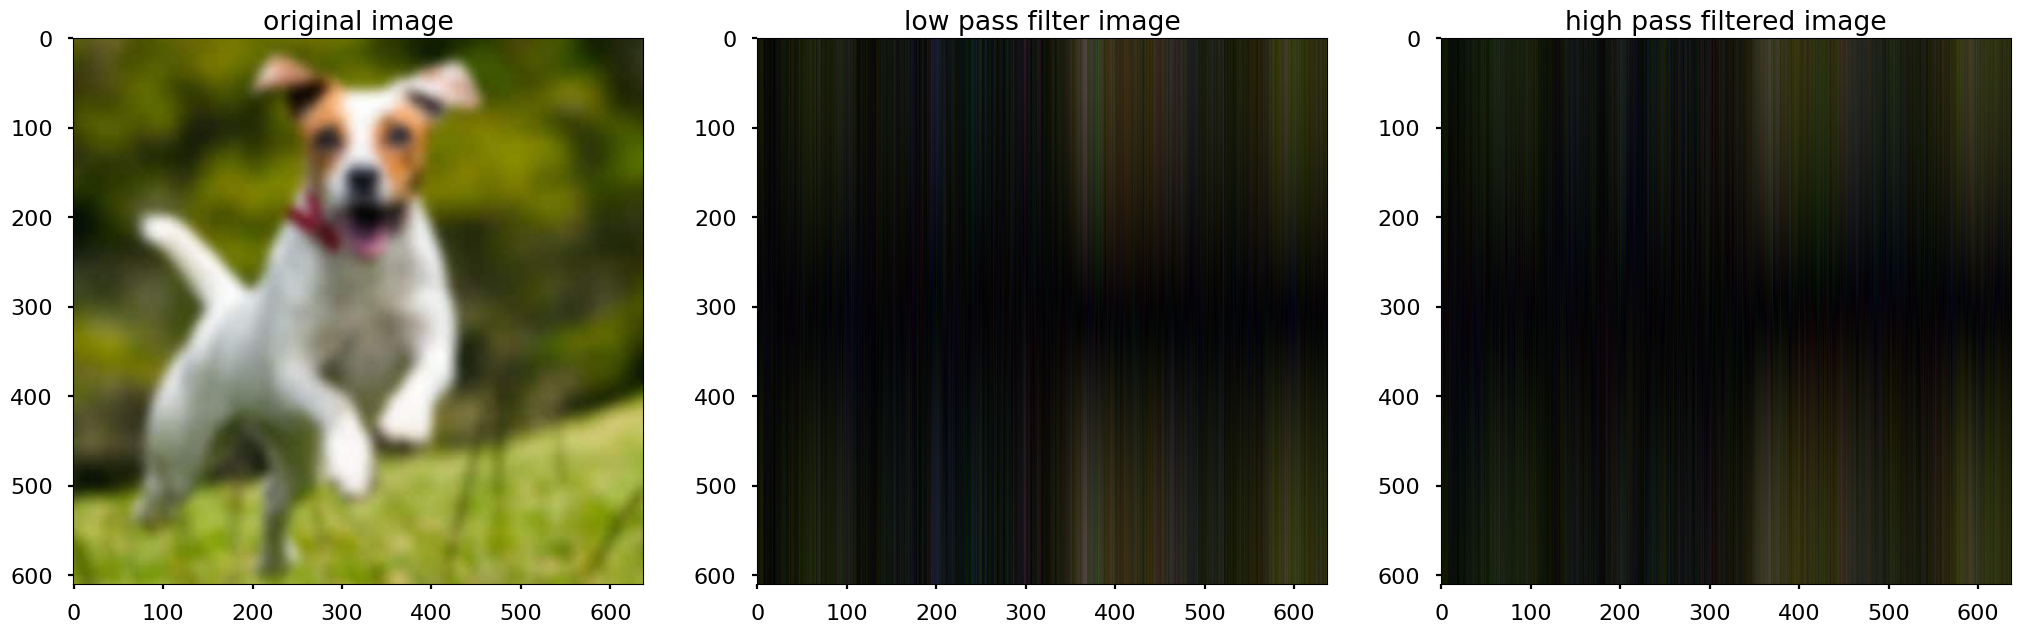

In [111]:
# knowing the properties of fourier transform
# to shapen the image, we partially filter out the low frequency in the spectrum
# to blur the image, we partially filter out the higher frequency in the spectrum
# finally apply inverse fourier transorm to cover back the processed original image

img = mpimg.imread("sample/blurred_dog.jpg")

def draw_cicle(shape, diamiter):
    '''
    Input:
    shape    : tuple (height, width)
    diameter : scalar
    
    Output:
    np.array of shape  that says True within a circle with diamiter =  around center 
    '''
    assert len(shape) == 2
    TF = np.zeros(shape, dtype=np.int8)
    center = np.array(TF.shape)/2.0

    for iy in range(shape[0]):
        for ix in range(shape[1]):
            TF[iy,ix] = (iy- center[0])**2 + (ix - center[1])**2 < diamiter **2
            
    return(TF)

TFcircleIN   = draw_cicle(shape=img.shape[:2],diamiter=50)
TFcircleOUT  = ~TFcircleIN

fft_img = np.zeros_like(img, dtype=complex)
for ichannel in range(fft_img.shape[2]):
    fft_img[:,:,ichannel] = np.fft.fftshift(np.fft.fft2(img[:,:,ichannel]))

def filter_circle(TFcircleIN,fft_img_channel):
    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    temp[TFcircleIN] = fft_img_channel[TFcircleIN]
    return(temp)

fft_img_filtered_IN = []
fft_img_filtered_OUT = []
## for each channel, pass filter
for ichannel in range(fft_img.shape[2]):
    fft_img_channel  = fft_img[:,:,ichannel]
    ## circle IN
    temp = filter_circle(TFcircleIN,fft_img_channel)
    fft_img_filtered_IN.append(temp)
    ## circle OUT
    temp = filter_circle(TFcircleOUT,fft_img_channel)
    fft_img_filtered_OUT.append(temp) 
    
fft_img_filtered_IN = np.array(fft_img_filtered_IN)
fft_img_filtered_IN = np.transpose(fft_img_filtered_IN,(1,2,0))
fft_img_filtered_OUT = np.array(fft_img_filtered_OUT)
fft_img_filtered_OUT = np.transpose(fft_img_filtered_OUT,(1,2,0))

abs_fft_img              = np.abs(fft_img)
abs_fft_img_filtered_IN  = np.abs(fft_img_filtered_IN)
abs_fft_img_filtered_OUT = np.abs(fft_img_filtered_OUT)

def imshow_fft(absfft):
    magnitude_spectrum = 20*np.log(absfft)
    return(ax.imshow(magnitude_spectrum,cmap="gray"))
    
def inv_FFT_all_channel(fft_img):
    img_reco = []
    for ichannel in range(fft_img.shape[2]):
        img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft_img[:,:,ichannel])))
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco,(1,2,0))
    return(img_reco)


img_reco              = inv_FFT_all_channel(fft_img)
img_reco_filtered_IN  = inv_FFT_all_channel(fft_img_filtered_IN)
img_reco_filtered_OUT = inv_FFT_all_channel(fft_img_filtered_OUT)

fig = plt.figure(figsize=(25,18))
ax  = fig.add_subplot(1,3,1)
ax.imshow(np.abs(img))
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(np.abs(img_reco_filtered_IN))
ax.set_title("low pass filter image")

ax  = fig.add_subplot(1,3,3)
ax.imshow(np.abs(img_reco_filtered_OUT))
ax.set_title("high pass filtered image")
plt.show()